In [ ]:
# Script to run pathway and drug enrichment analysis

In [2]:
import pandas
import gseapy as gp

In [3]:
correlated_genes = ['TMEFF2', 'SPON2', 'TRGC1', 'RPS8', 'RPS4X', 'CRISP3', 'AMACR', 'MYO6',
       'STEAP2', 'RPL7A', 'RPS12', 'RPL14', 'RPS27A', 'EEF1G', 'KLK3', 'NPY',
       'KLK2', 'IGKC', 'MT2A', 'LGALS1', 'NEFH', 'C1R', 'HLA-E', 'HLA-DRA',
       'DES', 'IGFBP7', 'COL1A2', 'LGALS3BP', 'HSPB1', 'AZGP1', 'GSTP1',
       'PTGDS', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M', 'FLNA', 'MYL9', 'IFITM3',
       'CD74', 'TPM2', 'ACTA2', 'TIMP1', 'S100A6', 'MSMB']

In [4]:
enr_KEEG = gp.enrichr(gene_list=list(correlated_genes),
                      gene_sets='MSigDB_Hallmark_2020',
                      organism='Human').results
summary_genes = enr_KEEG[enr_KEEG['Adjusted P-value'] < 0.05][['Term','Odds Ratio','P-value', 'Adjusted P-value','Gene_set','Genes']]
summary_genes

,Term,Odds Ratio,P-value,Adjusted P-value,Gene_set,Genes
0,Epithelial Mesenchymal Transition,22.255631,1.364311e-08,3.410779e-07,MSigDB_Hallmark_2020,ACTA2;TAGLN;COL1A2;LGALS1;TPM2;FLNA;TIMP1;MYL9
1,Interferon Gamma Response,18.862013,2.960870e-07,2.467392e-06,MSigDB_Hallmark_2020,IFITM3;LGALS3BP;CD74;MT2A;C1R;HLA-A;B2M
2,Allograft Rejection,18.862013,2.960870e-07,2.467392e-06,MSigDB_Hallmark_2020,CD74;HLA-DRA;FLNA;HLA-A;TIMP1;B2M;HLA-E
3,Interferon Alpha Response,20.836087,6.650210e-05,3.744650e-04,MSigDB_Hallmark_2020,IFITM3;LGALS3BP;CD74;B2M
4,Androgen Response,20.181911,7.489300e-05,3.744650e-04,MSigDB_Hallmark_2020,AZGP1;KLK3;KLK2;B2M
5,Apoptosis,12.302625,4.661042e-04,1.942101e-03,MSigDB_Hallmark_2020,IFITM3;HSPB1;TIMP1;NEFH
6,Myogenesis,9.835241,1.049158e-03,3.746992e-03,MSigDB_Hallmark_2020,TAGLN;DES;TPM2;IGFBP7


In [5]:
enr_KEEG = gp.enrichr(gene_list=correlated_genes,
                      gene_sets='DGIdb_Drug_Targets_2024', 
                      organism='Human').results
summary_drugs = enr_KEEG[enr_KEEG['Adjusted P-value'] < 0.05][['Term','Odds Ratio','P-value', 'Adjusted P-value','Gene_set','Genes']]
summary_drugs

,Term,Odds Ratio,P-value,Adjusted P-value,Gene_set,Genes
0,MT 3724,41.332640,2.434216e-08,7.911201e-07,DGIdb_Drug_Targets_2024,RPS4X;RPL7A;RPS8;RPL14;RPS27A;RPS12
1,ATALUREN,41.332640,2.434216e-08,7.911201e-07,DGIdb_Drug_Targets_2024,RPS4X;RPL7A;RPS8;RPL14;RPS27A;RPS12
2,CYCLOHEXIMIDE,35.133510,6.041739e-08,1.309043e-06,DGIdb_Drug_Targets_2024,RPS4X;RPL7A;RPS8;RPL14;RPS27A;RPS12
3,DORLIMOMAB ARITOX,33.582770,9.130377e-07,1.483686e-05,DGIdb_Drug_Targets_2024,RPS4X;RPL7A;RPL14;RPS27A;RPS12
4,PLATINUM,57.962209,7.402016e-04,8.018851e-03,DGIdb_Drug_Targets_2024,CD74;GSTP1
5,IPILIMUMAB,57.962209,7.402016e-04,8.018851e-03,DGIdb_Drug_Targets_2024,HLA-A;B2M
6,NIVOLUMAB,37.079070,1.676397e-03,1.556655e-02,DGIdb_Drug_Targets_2024,HLA-DRA;B2M
7,PEMBROLIZUMAB,28.957849,2.652714e-03,2.155330e-02,DGIdb_Drug_Targets_2024,HLA-DRA;B2M


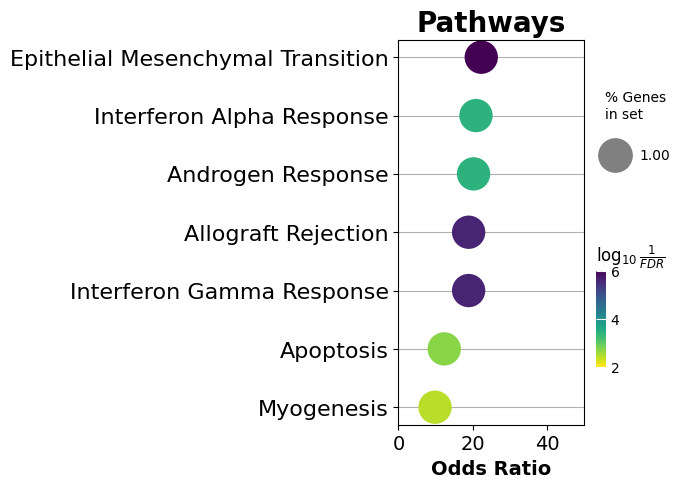

In [6]:
from gseapy import dotplot

ax = dotplot(summary_genes, title='Pathways',cmap='viridis_r', size=4, figsize=(3,5))
ax.set_xlim(0,50)
ax.set_xticks(range(0, 51, 20))
ax.figure.savefig("pathways_MSigDB_Hallmark_2020_dotplot.png", dpi=300, bbox_inches='tight')

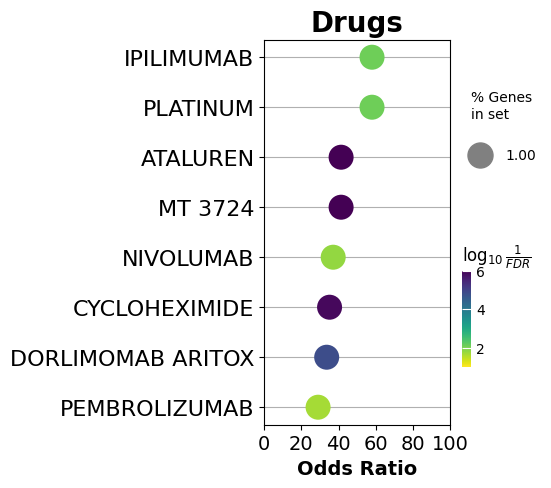

In [7]:
ax = dotplot(summary_drugs, title='Drugs',cmap='viridis_r', size=3, figsize=(3,5))
ax.set_xlim(0,100)
ax.set_xticks(range(0, 101, 20))
ax.figure.savefig("drugs_MSigDB_Hallmark_2020_dotplot.png", dpi=300, bbox_inches='tight')